In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


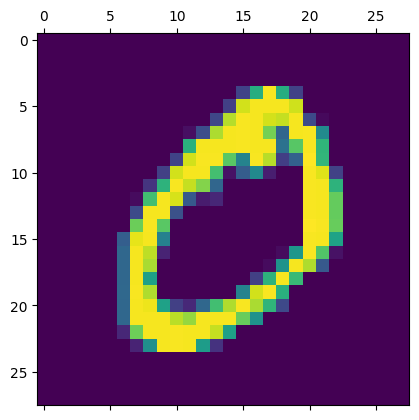

In [14]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Display the shape of the training and test datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Visualize the first training image
plt.matshow(X_train[1])
plt.show()

In [15]:
# Normalize the data to scale the pixel values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images to convert each 28x28 image into a 784-dimensional vector
X_train_flatten = X_train.reshape(len(X_train), 28 * 28)
X_test_flatten = X_test.reshape(len(X_test), 28 * 28)

In [16]:
# Define a simple neural network model with one hidden layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  # Output layer with 10 classes
])

# Compile the model with optimizer, loss function, and accuracy metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data for 5 epochs
model.fit(X_train_flatten, y_train, epochs=5)

C:\Users\gauta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8101 - loss: 0.7274
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9152 - loss: 0.3081
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9216 - loss: 0.2835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9244 - loss: 0.2710
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9265 - loss: 0.2648


In [17]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_flatten, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9132 - loss: 0.3064
Test accuracy: 0.9236999750137329


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


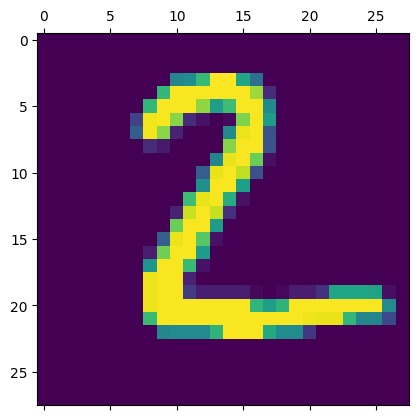

In [18]:
# Make predictions on the test dataset
y_predicted = model.predict(X_test_flatten)

# Display the first test image and its predicted label
plt.matshow(X_test[1])
plt.show()

Predicted label for first test image: 7
First 5 predicted labels: [7, 2, 1, 0, 4]


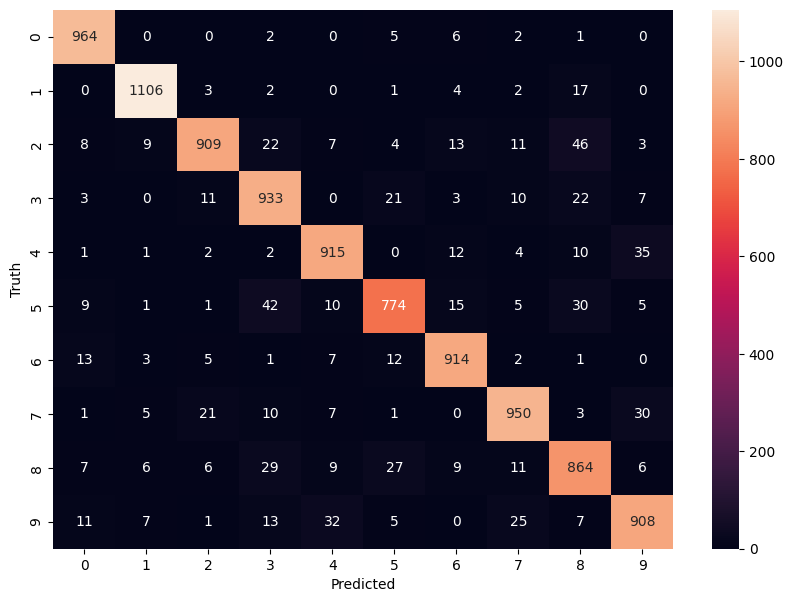

In [19]:
# Retrieve and display the predicted label for the first test image
print(f"Predicted label for first test image: {np.argmax(y_predicted[0])}")

# Convert the predicted probabilities to predicted class labels
y_predicted_labels = [np.argmax(pred) for pred in y_predicted]
print(f"First 5 predicted labels: {y_predicted_labels[:5]}")

# Generate and visualize the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [20]:
# Improving the model: Add a hidden layer with 100 neurons and 'relu' activation
model_improved = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  # Hidden layer with 100 units
    keras.layers.Dense(10, activation='sigmoid')  # Output layer with 10 units for classification
])

# Compile the improved model
model_improved.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the improved model for 5 epochs
model_improved.fit(X_train_flatten, y_train, epochs=5)

# Evaluate the improved model on the test data
test_loss, test_accuracy = model_improved.evaluate(X_test_flatten, y_test)
print(f"Test accuracy (improved model): {test_accuracy}")


C:\Users\gauta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8739 - loss: 0.4463
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.1252
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9752 - loss: 0.0831
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9819 - loss: 0.0604
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9862 - loss: 0.0473
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9708 - loss: 0.0941
Test accuracy (improved model): 0.9754999876022339


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


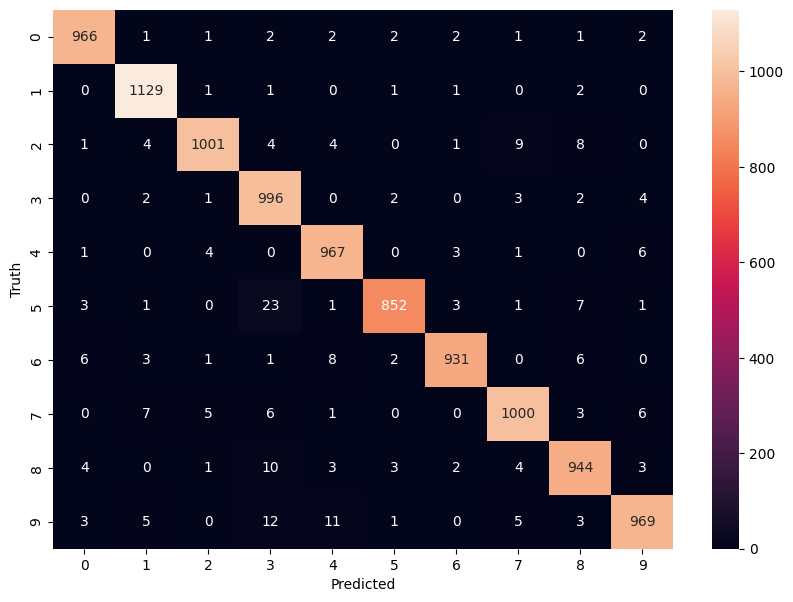

In [21]:
# Make predictions using the improved model on the test dataset
y_pred_improved = model_improved.predict(X_test_flatten)

# Convert predicted probabilities to class labels for the improved model
y_predicted_labels_improved = [np.argmax(pred) for pred in y_pred_improved]

# Generate and visualize the confusion matrix for the improved model
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels_improved)

plt.figure(figsize=(10, 7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
